# Reaction Paths

Code is adapted from the cantera example file `reaction_path.py` (distributed with cantera):

```
"""
Viewing a reaction path diagram.

This script uses Graphviz to generate an image. 
"""
```

In order to install graphviz, run the following:

    !conda install -y graphviz
    !conda install -y python-graphviz

In [1]:
import os
import graphviz
import cantera as ct

In [2]:
# these lines can be replaced by any commands that generate
# an object of a class derived from class Kinetics in some state.
gas = ct.Solution('gri30.xml')
gas.TPX = 1300.0, ct.one_atm, 'CH4:0.4, O2:1, N2:3.76'
r = ct.IdealGasReactor(gas)
net = ct.ReactorNet([r])
T = r.T
while T < 1900:
    net.step()
    T = r.T
net.time

0.00990514139372361

In [3]:
element = 'C'

diagram = ct.ReactionPathDiagram(gas, element)
diagram.title = 'Reaction path diagram following {} at {:6.2f} Kelvins'.format(element,r.T)
diagram.label_threshold = 0.01
diagram.flow_type = 'OneWayFlow'
#diagram.flow_type = 'NetFlow'
diagram.threshold = .05

dot_file = 'rxnpath.dot'
img_file = 'rxnpath.png'
img_path = os.path.join(os.getcwd(), img_file)

diagram.write_dot(dot_file)
#print(diagram.get_data())

print("Wrote graphviz input file to '{0}'.".format(os.path.join(os.getcwd(), dot_file)))

Wrote graphviz input file to '/home/ischoegl/Desktop/lsucombustion/ME4443/examples/rxnpath.dot'.


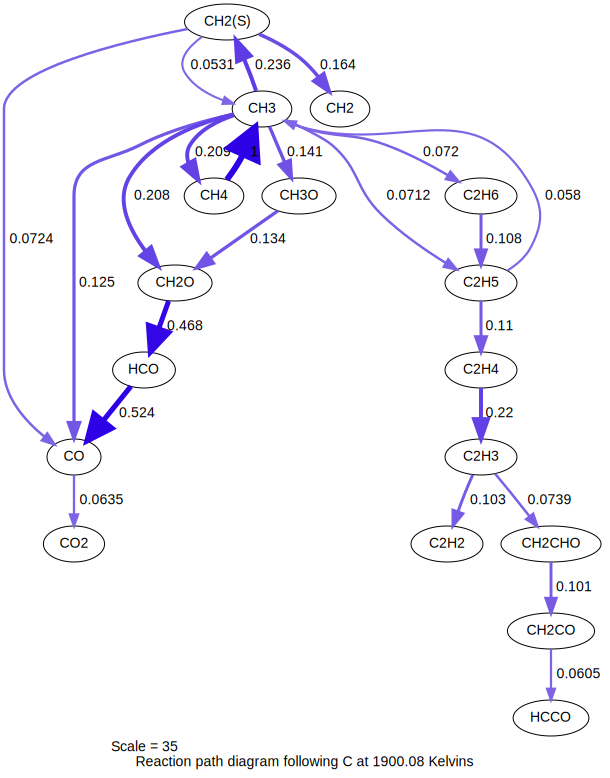

In [5]:
with open(dot_file) as f:
    dot_graph = f.read()
g1 = graphviz.Source(dot_graph)
display(g1)

In [14]:
g1.format = 'svg'
filename = g1.render(filename='rxnpath')
print(filename)

rxnpath.svg
